In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:/Users/Muskan Rajput/OneDrive/Documents/Data_Science_Project/Churn_Modelling.csv')


In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#to find out the null value
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#drop all unnecessary column
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

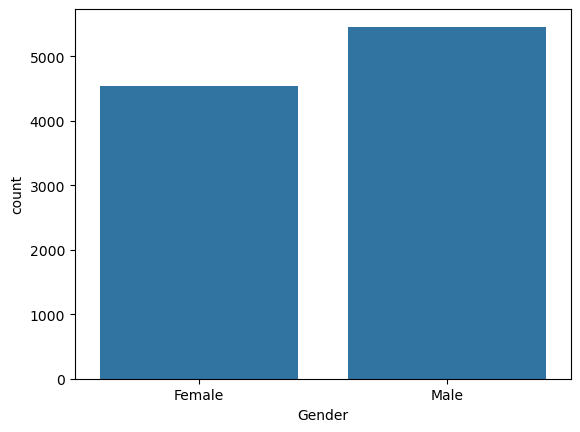

In [10]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='Age', ylabel='Count'>

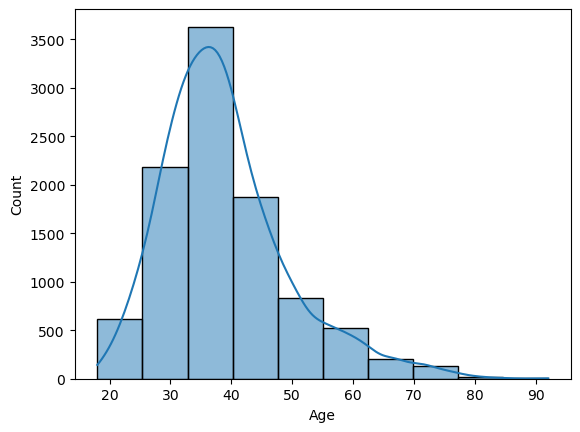

In [11]:
sns.histplot(x=df['Age'],bins=10,kde=True)

<Axes: xlabel='Tenure', ylabel='count'>

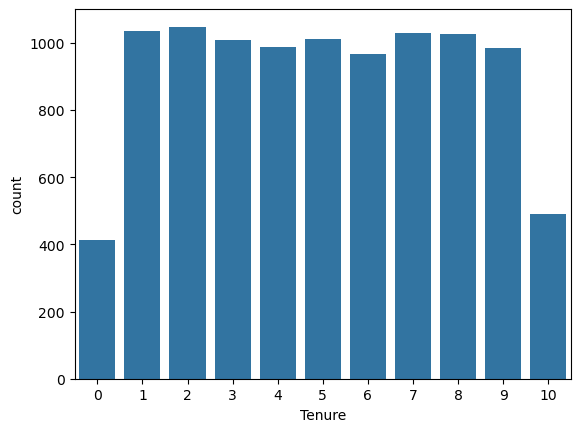

In [12]:
sns.countplot(x=df['Tenure'])

<Axes: xlabel='CreditScore', ylabel='Count'>

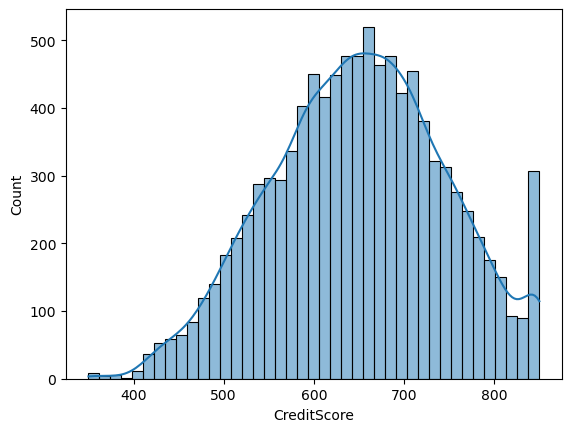

In [13]:
sns.histplot(x=df['CreditScore'],kde='True')

<Axes: xlabel='HasCrCard', ylabel='count'>

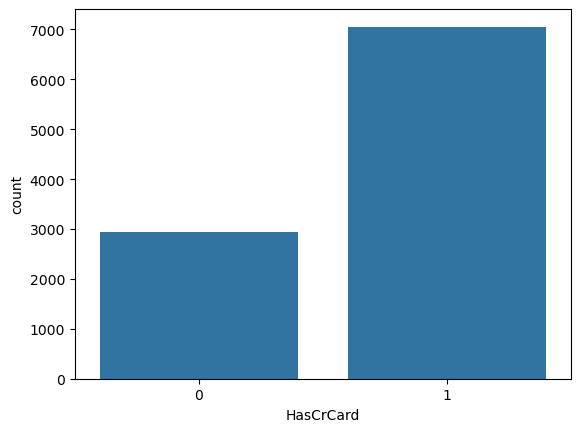

In [14]:
sns.countplot(x='HasCrCard', data=df)

<Axes: xlabel='Exited', ylabel='count'>

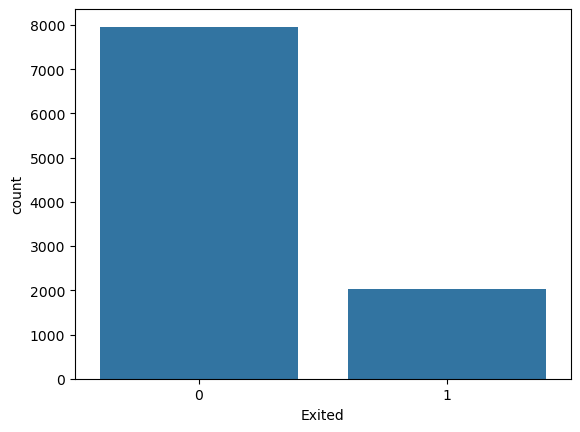

In [15]:
sns.countplot(x=df['Exited'])

Since the data we received is not evenly distributed — for example, the value 0 appears 8000 times and 1 appears 2000 times — the dataset is imbalanced.
To handle this imbalance and avoid bias during training and testing, we will apply SMOTE (Synthetic Minority Oversampling Technique). SMOTE helps balance the dataset by generating synthetic samples for the minority class instead of simply duplicating existing ones.

Firstly convert the categorial data into numerical data
1.Gender -using LabelEncoding
2. Geography- using OneHotEncoding

In [16]:
label_encoder_gender=LabelEncoder()
df['Gender']=label_encoder_gender.fit_transform(df['Gender'])

In [17]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [18]:
##onehot encode
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(df[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [19]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [20]:
df_1=pd.DataFrame(geo_encoder.toarray(),columns=onehot_encoder_geo.get_feature_names_out(['Geography']))

In [21]:
df_1

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [22]:
df_1=df_1.drop(columns=['Geography_Spain'],axis=1)

In [23]:
df_1

,Geography_France,Geography_Germany
0,1.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
9995,1.0,0.0
9996,1.0,0.0
9997,1.0,0.0
9998,0.0,1.0


In [24]:
df=pd.concat([df.drop(columns=['Geography'],axis=1),df_1],axis=1)

In [25]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0


In [27]:
##save the encoder and scaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open ('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [29]:
## divide the dataset into dependent and independent feature
X=df.drop(columns=['Exited'],axis=1)
y=df['Exited']

##split the data in training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##Scale these feature
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [30]:
##to balance the unbalance data-apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [34]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

ANN Implementation

In [36]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 3.8 MB/s eta 0:01:27
   ---------------------------------------- 1.3/332.0 MB 3.5 MB/s eta 0:01:35
   ---------------------------------------- 2.1/332.0 MB 3.6 MB/s eta 0:01:33
   ---------------------------------------- 2.6/332.0 MB 3.5 MB/s eta 0:01:34
   ---------------------------------------- 3.4/332.0 MB 3.4 MB/s eta 0:01:37
   ---------------------------------------- 3.9/332.0 MB 3.2 MB/s eta 0:01:43
    --------------------------------------- 4.7/332.0 MB 3.2 MB/s eta 0:01:41
    --------------------------------------- 5.5/332.0 MB 3.3 MB/s eta 0:01:40
    --------------------------------------- 6.0/332.0 MB 3.2 MB/s eta 0:01:41
    --------------------------------------- 6.6/332.0 MB 3.2 MB/s eta 0:01:44
    --------------------------------------- 7.3/332.0 MB 3.2 MB/s eta 0:01:44
    --------------------------------------- 8.1/332.0 MB 3.2 MB/s eta 0

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [60]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),  ##HL1
    Dense(32,activation='relu'),  ##HL2
    Dense(1,activation='sigmoid')  ##output_layer
]
                )

C:\Users\Muskan Rajput\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [63]:
## complie the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [64]:
##Set up the Tensorboard
log_dir="logs/fit"

In [65]:
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)


In [66]:
##Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True)

In [67]:
##train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7680 - loss: 0.4748 - val_accuracy: 0.7560 - val_loss: 0.4987
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7920 - loss: 0.4386 - val_accuracy: 0.7385 - val_loss: 0.5211
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7993 - loss: 0.4270 - val_accuracy: 0.7805 - val_loss: 0.4845
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8092 - loss: 0.4131 - val_accuracy: 0.7830 - val_loss: 0.4802
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8157 - loss: 0.3971 - val_accuracy: 0.8060 - val_loss: 0.4341
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8216 - loss: 0.3889 - val_accuracy: 0.7695 - val_loss: 0.4643
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8238 - loss: 0.3793 - val_accuracy: 0.7685 - val_loss: 0.4942
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8331 - loss: 0.3668 - val_accu

In [68]:
model.save('model.h5')

In [69]:
##Load tensorboard Extension
%load_ext tensorboard

In [70]:
%tensorboard --logdir logs/fit